In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [14]:
# https://www.kaggle.com/datasets/arslanali4343/real-estate-dataset

data = pd.read_csv('./data.csv')

data

# CRIM: 지역 범죄율 (per capita crime)
# ZN: 소속 도시에 25,000 제곱 피트(sq.ft) 이상의 주택지 비율
# INDUS: 소속 도시에 상업적 비즈니스에 활용되지 않는 농지 면적
# CHAS: 해당 지역이 Charles 강과 접하고 있는지 여부 (dummy variable)
# NOX: 소속 도시의 산화질소 농도
# RM: 해당 지역의 자택당 평균 방 갯수
# AGE: 해당 지역에 1940년 이전에 건설된 주택의 비율
# DIS: 5개의 보스턴 고용 센터와의 거리에 따른 가중치 부여
# RAD: 소속 도시가 Radial 고속도로와의 접근성 지수
# TAX: 소속 도시의 10000달러당 재산세
# PTRATIO: 소속 도시의 학생-교사 비율
# B: 해당 지역의 흑인 지수 (1000(Bk - 0.63)^2), Bk는 흑인의 비율
# LSTAT: 해당 지역의 빈곤층 비율
# MEDV: 해당 지역의 주택 가격 (중앙값) (corrected median values of housing in USD 1000)

# 집값에 영향을 미치는 요인들


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.98765,0.0,12.50,0,0.561,6.980,89.0,2.0980,3,320,23.0,396.00,12.00,12.0
507,0.23456,0.0,12.50,0,0.561,6.980,76.0,2.6540,3,320,23.0,343.00,25.00,32.0
508,0.44433,0.0,12.50,0,0.561,6.123,98.0,2.9870,3,320,23.0,343.00,21.00,54.0
509,0.77763,0.0,12.70,0,0.561,6.222,34.0,2.5430,3,329,23.0,343.00,76.00,67.0


In [20]:
# Person 상관계수
cols = ['MEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

corr = data[cols].corr(method = 'pearson')
corr

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
MEDV,1.000000,-0.380072,0.339767,-0.463269,0.164782,-0.411486,0.667695,-0.368203,0.233469,-0.379016,-0.459274,-0.447464,0.317941,-0.562960
CRIM,-0.380072,1.000000,-0.198451,0.405524,-0.054906,0.420524,-0.220363,0.350847,-0.377028,0.625964,0.583389,0.276695,-0.384356,0.405030
ZN,0.339767,-0.198451,1.000000,-0.534106,-0.041333,-0.516256,0.307812,-0.567796,0.665185,-0.307146,-0.311531,-0.392844,0.175637,-0.390029
INDUS,-0.463269,0.405524,-0.534106,1.000000,0.062332,0.763583,-0.392193,0.642817,-0.707886,0.591784,0.718764,0.379441,-0.356955,0.556707
CHAS,0.164782,-0.054906,-0.041333,0.062332,1.000000,0.091023,0.089952,0.085814,-0.097541,-0.005343,-0.034244,-0.124415,0.048970,-0.057013
NOX,-0.411486,0.420524,-0.516256,0.763583,0.091023,1.000000,-0.301778,0.729233,-0.768309,0.609343,0.666982,0.186073,-0.379936,0.540050
RM,0.667695,-0.220363,0.307812,-0.392193,0.089952,-0.301778,1.000000,-0.237335,0.199853,-0.213078,-0.293969,-0.339755,0.127888,-0.553126
AGE,-0.368203,0.350847,-0.567796,0.642817,0.085814,0.729233,-0.237335,1.000000,-0.745097,0.452229,0.503360,0.258251,-0.271925,0.529994
DIS,0.233469,-0.377028,0.665185,-0.707886,-0.097541,-0.768309,0.199853,-0.745097,1.000000,-0.488474,-0.530379,-0.238155,0.290997,-0.467063
RAD,-0.379016,0.625964,-0.307146,0.591784,-0.005343,0.609343,-0.213078,0.452229,-0.488474,1.000000,0.910211,0.438646,-0.442406,0.422389


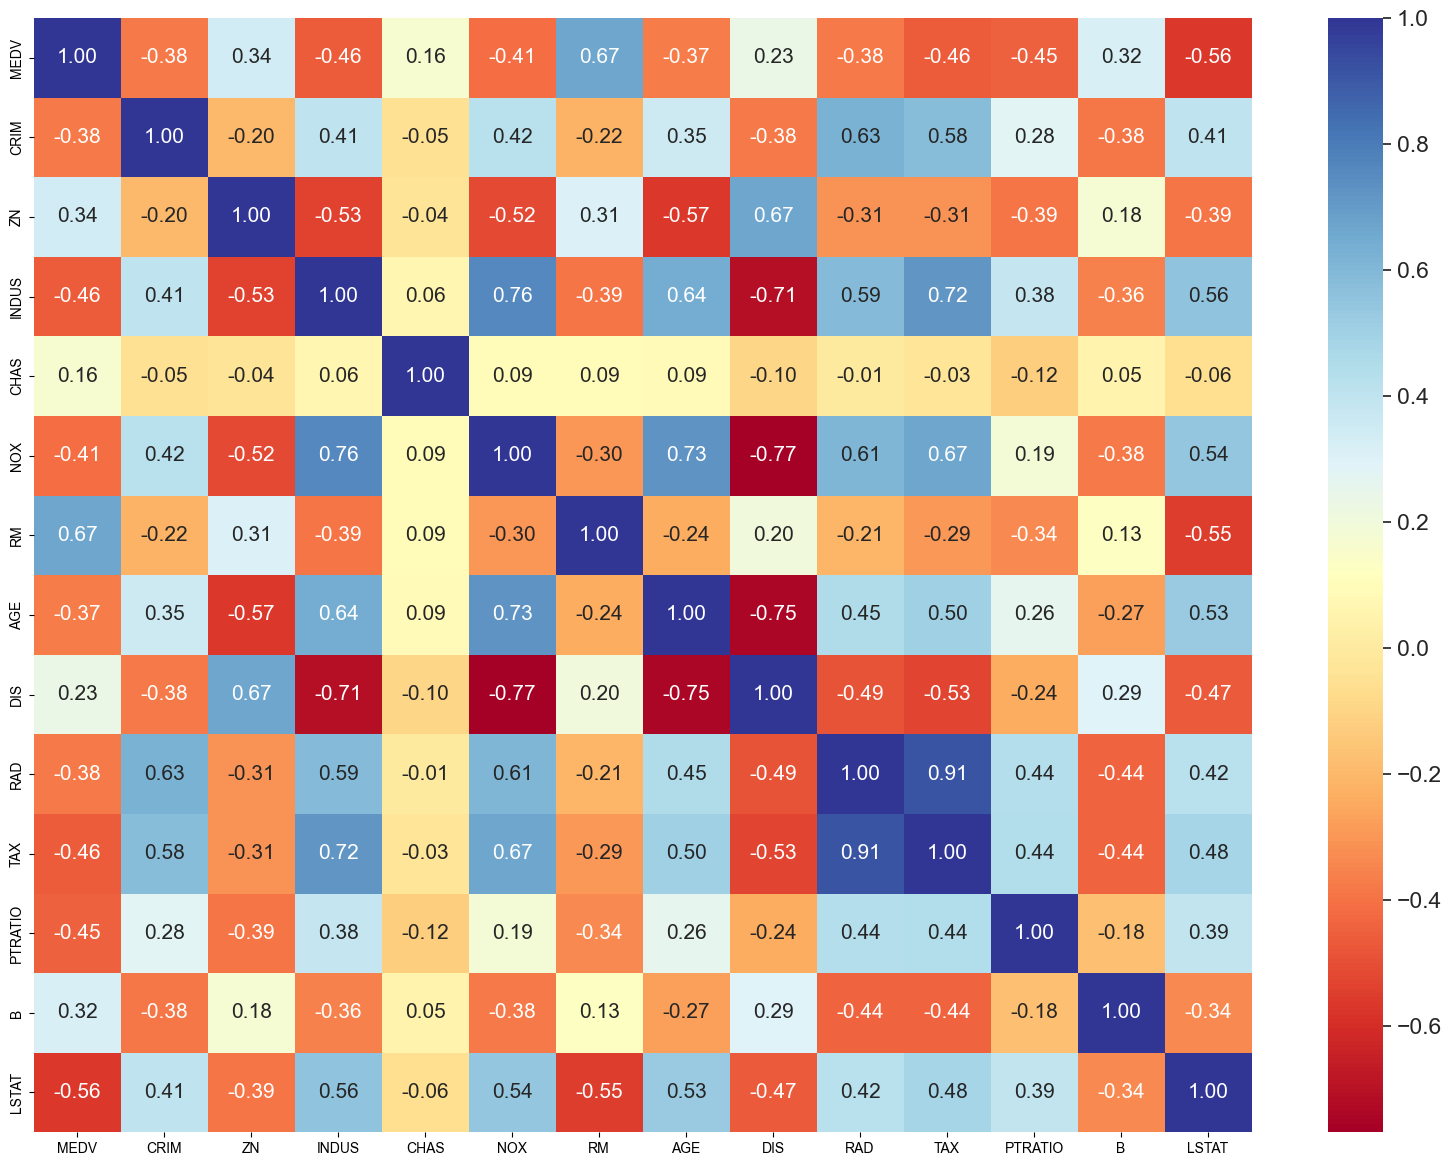

In [21]:
# heatmap (seaborn)
fig = plt.figure(figsize = (16, 12))
ax = fig.gca()

sns.set(font_scale = 1.5)  # heatmap 안의 font-size 설정
heatmap = sns.heatmap(corr.values, annot = True, fmt='.2f', annot_kws={'size':15},
                      yticklabels = cols, xticklabels = cols, ax=ax, cmap = "RdYlBu")
plt.tight_layout()
plt.show()

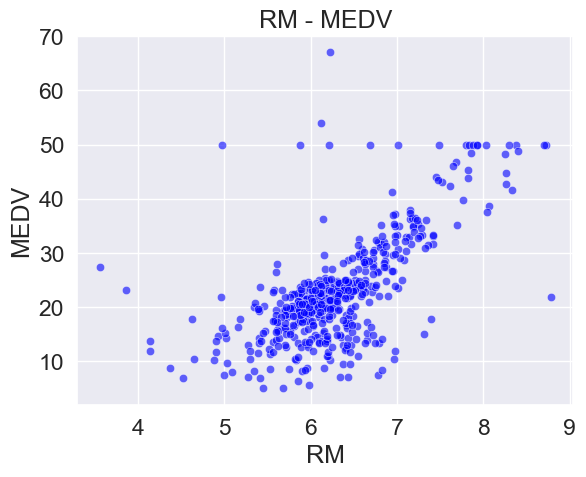

In [24]:
# 집값 상승요인 확인

# 방 갯수(RM) + 집값(MEDV) : 0.67
sns.scatterplot(data=data, x='RM', y='MEDV', markers='o', color='blue', alpha=0.6)
plt.title('RM - MEDV')
plt.show()

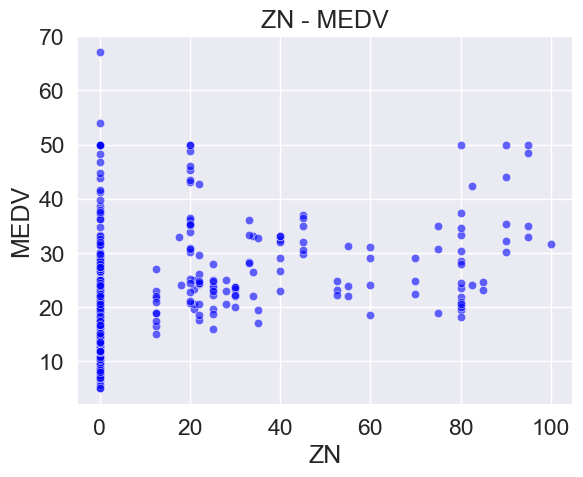

In [25]:
# 소속 도시에 25,000 제곱 피트(sq.ft) 이상의 주택지 비율 : 0.34
sns.scatterplot(data=data, x='ZN', y='MEDV', markers='o', color='blue', alpha=0.6)
plt.title('ZN - MEDV')
plt.show()

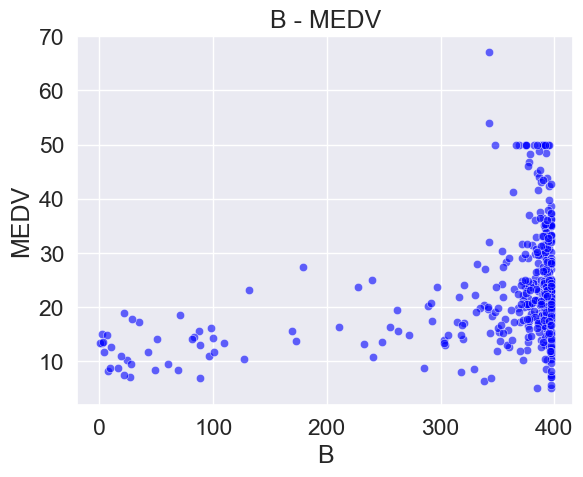

In [26]:
# 해당 지역의 흑인 지수 (1000(Bk - 0.63)^2), Bk는 흑인의 비율 :0.32
sns.scatterplot(data=data, x='B', y='MEDV', markers='o', color='blue', alpha=0.6)
plt.title('B - MEDV')
plt.show()

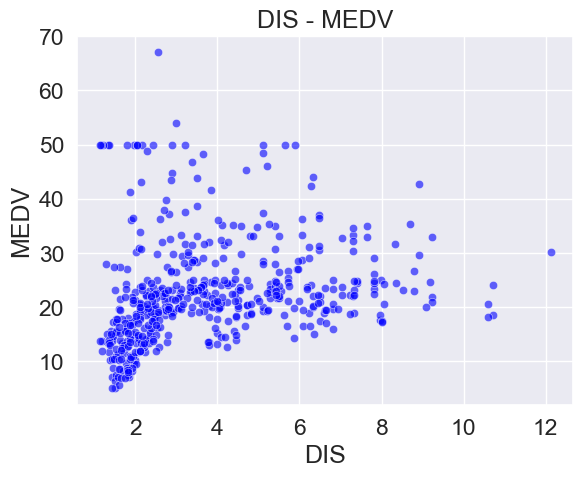

In [27]:
# 5개의 보스턴 고용 센터와의 거리에 따른 가중치 부여 : 0.23
sns.scatterplot(data=data, x='DIS', y='MEDV', markers='o', color='blue', alpha=0.6)
plt.title('DIS - MEDV')
plt.show()

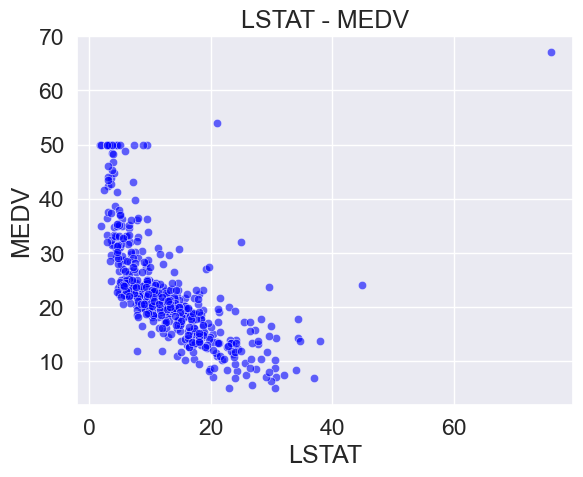

In [32]:
# 집값 하락 요인 확인

#해당 지역의 빈곤층 비율
sns.scatterplot(data=data, x='LSTAT', y='MEDV', markers='o', color='blue', alpha=0.6)
plt.title('LSTAT - MEDV')
plt.show()

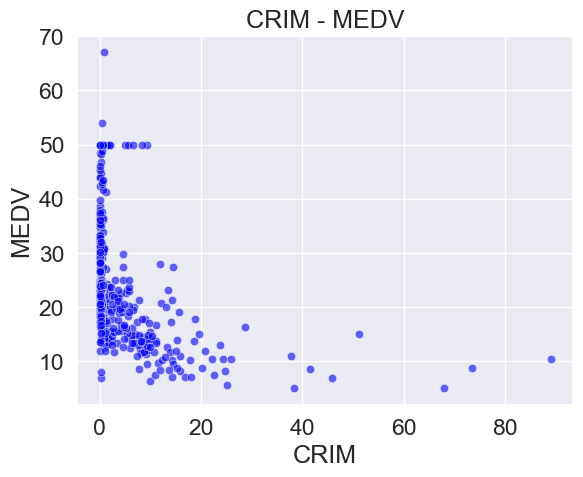

In [35]:
# 지역범죄율(CRIM) - 집값(MEDV)
sns.scatterplot(data=data, x='CRIM', y='MEDV', markers='o', color='blue', alpha=0.6)
plt.title('CRIM - MEDV')
plt.show()

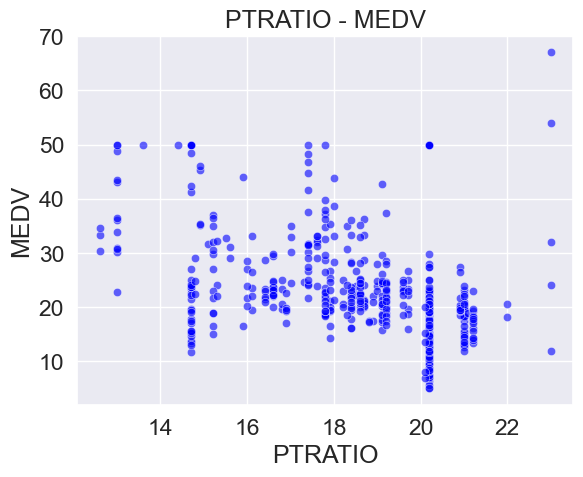

In [36]:
#소속 도시의 학생-교사 비율
sns.scatterplot(data=data, x='PTRATIO', y='MEDV', markers='o', color='blue', alpha=0.6)
plt.title('PTRATIO - MEDV')
plt.show()

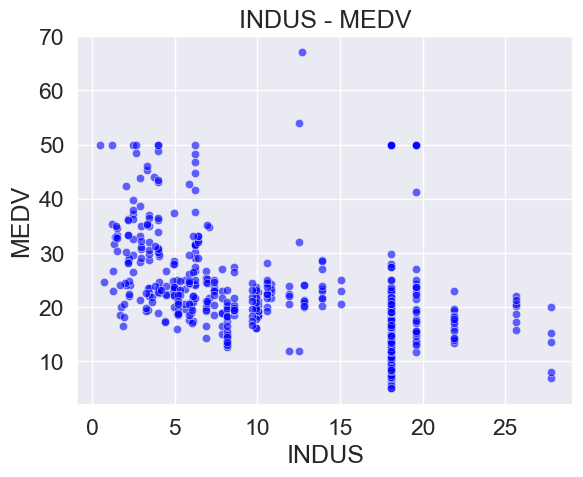

In [38]:
#소속 도시에 상업적 비즈니스에 활용되지 않는 농지 면적
sns.scatterplot(data=data, x='INDUS', y='MEDV', markers='o', color='blue', alpha=0.6)
plt.title('INDUS - MEDV')
plt.show()

In [ ]:
# 상관관계 대표 4개씩 살펴 본 결과
# 방이 많고 집이 넓고 흑인 비율이 높고 교사 수가 많을 수록 집값이 올라갈 확률이 높다
# 반대로 빈곤층이 많고 범죄율이 높고 교사수 보다 학생수가 많은 곳은 집값이 낮을 확률이 높다